## Packages importing

In [49]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

BASE_PATH = Path("datasets/")

sns.set()
tqdm.pandas()

 ### Loading data

In [50]:
def get_text_files(file_name: str):
    '''open file and return the content'''
    with open(file_name, "r", encoding="utf8") as file:
        txt = file.read()
    return txt

In [51]:
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')

In [8]:
wiki.sample(4, random_state=34)

,file_path,dataset_name,length
8148,datasets/wikitext_raw/wiki6182.txt,wiki_text,884
205,datasets/wikitext_raw/wiki10181.txt,wiki_text,521
1311,datasets/wikitext_raw/wiki11177.txt,wiki_text,313
10147,datasets/wikitext_raw/wiki7982.txt,wiki_text,935


In [9]:
mag.sample(4, random_state=42)

,file_path,dataset_name,length
1242,datasets/magazine_raw/mag2115.txt,magazine_text,3812
1407,datasets/magazine_raw/mag2264.txt,magazine_text,4365
2579,datasets/magazine_raw/mag3319.txt,magazine_text,3681
1075,datasets/magazine_raw/mag1966.txt,magazine_text,2132


In [52]:
wiki['content'] = wiki['file_path'].progress_map(get_text_files)
mag['content'] = mag['file_path'].progress_map(get_text_files)

100%|██████████████████████████████████████████████████████████████████████████████████| 12388/12388 [01:59<00:00, 103.61it/s]


In [11]:
mag.sample(4)

,file_path,dataset_name,length,content
7067,datasets/magazine_raw/mag7359.txt,magazine_text,917,ഫ്‌ളോറിഡ : മുന്‍ കാമുകിയുടെ കത്തിന് 100 ല്‍ 61...
2001,datasets/magazine_raw/mag28.txt,magazine_text,1648,"സൂക്ഷിച്ചുനോക്കൂ, ഇടതൂര്‍ന്ന ഈ കാട്ടിനുള്ളില്‍..."
721,datasets/magazine_raw/mag1647.txt,magazine_text,3163,സമുദ്രത്തിലെ പ്ലാസ്റ്റിക് മാലിന്യങ്ങൾ അടുത്ത 2...
7517,datasets/magazine_raw/mag7764.txt,magazine_text,1521,ചെന്നൈ: എം.എസ് സുബ്ബലക്ഷ്മി എന്ന് കേള്‍ക്കുമ്പ...


In [12]:
wiki.sample(4)

,file_path,dataset_name,length,content
3261,datasets/wikitext_raw/wiki1784.txt,wiki_text,1615,ഹിന്ദി സിനിമയിലെ പ്രശസ്ത നടനും ഗുസ്തിക്കാരനുമാ...
7540,datasets/wikitext_raw/wiki5635.txt,wiki_text,105,ഗ്രിഗോറിയൻ കലണ്ടർ പ്രകാരം ജനുവരി 5 വർഷത്തിലെ 5...
1337,datasets/wikitext_raw/wiki1120.txt,wiki_text,784,തെക്കേഇന്ത്യയിലെ തമിഴ്നാട് സംസ്ഥാനത്തെ തിരുവാര...
1797,datasets/wikitext_raw/wiki11614.txt,wiki_text,448,Coordinates: 9°10′39.67″N 76°33′35.18″E / 9.17...


### Analysing

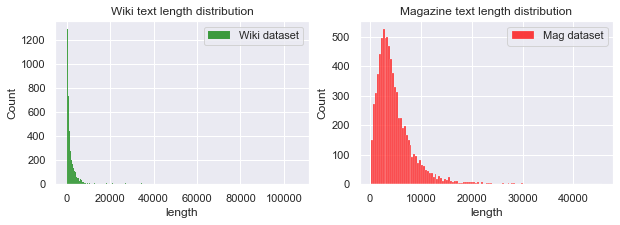

In [26]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 3))

sns.histplot(wiki['length'], ax = ax[0], color = 'green', label="Wiki dataset")
sns.histplot(mag['length'], ax = ax[1], color = 'red', label="Mag dataset")

ax[0].legend()
ax[1].legend()
ax[0].set_title('Wiki text length distribution')
ax[1].set_title('Magazine text length distribution')

plt.show()

#### Checking for Duplicates

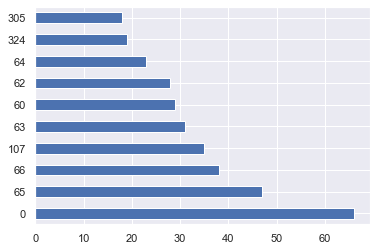

In [53]:
wiki['length'].value_counts().head(10).plot.barh();

In [55]:
wiki.describe()

,length
count,12388.000000
mean,2269.721101
std,4845.988836
min,0.000000
25%,451.750000
50%,959.000000
75%,2200.000000
max,106224.000000


In [79]:
wiki = wiki[wiki['length'] >= 200]
wiki.drop('content', axis =1).to_csv(BASE_PATH/"wikitext_files.csv", index = False)

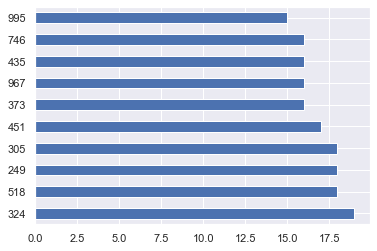

In [60]:
wiki['length'].value_counts().head(10).plot.barh();

In [74]:
wiki[wiki['length'] == 995]['content'].sample(10)
# just keeping the data because we're going to build language model.

5641     ലോകത്തിലെ ഏറ്റവും ഉയരം കൂടിയ കൊടുമുടികളിലൊന്നാ...
5551     പഞ്ചാബ് സംസ്ഥാനത്തെ കപൂർത്തല ജില്ലയിലെ ഒരു വില...
6412     ജൂതദാർശനികൻ. സ്പിനോസയുടെ മുൻഗാമി. പോർച്ചുഗലിൽ ...
9961     പ്രശസ്ത ഗണിതശാസ്ത്രജ്ഞനും, സാമ്പത്തിക ശാസ്ത്രത...
3306     ലോകത്തിലെ ഏറ്റവും ഉയരം കൂടിയ കൊടുമുടികളിലൊന്നാ...
11036    പഞ്ചാബ് സംസ്ഥാനത്തെ കപൂർത്തല ജില്ലയിലെ ഒരു വില...
5726     പ്രശസ്ത ഗണിതശാസ്ത്രജ്ഞനും, സാമ്പത്തിക ശാസ്ത്രത...
3199     സമൃദ്ധിയുടേയും ഉർവരതയുടേയും ദേവതയാണു ലജ്ജാ ഗൗര...
3022     പഞ്ചാബ് സംസ്ഥാനത്തെ ലുധിയാന ജില്ലയിലെ ഒരു വില്...
7053     ഡാന്യൂബ്-ഇപ്പോളി ദേശീയോദ്യാനം ഹംഗറിയിലെ ഏറ്റവു...
Name: content, dtype: object

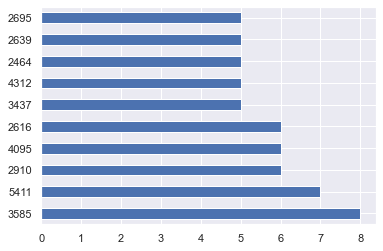

In [69]:
mag['length'].value_counts().head(10).plot.barh();

In [56]:
mag.describe()

,length
count,7863.000000
mean,4887.352792
std,3907.649499
min,203.000000
25%,2417.000000
50%,3889.000000
75%,6188.000000
max,45545.000000


In [77]:
mag[mag['length'] == 3585]['content'].sample(8)
# just keeping the data because we're going to build language model.

5805    ഉള്ളിലുണ്ടാവും, തോരാതെ ചില മഴകള്‍. മഴക്കാലങ്ങള...
2538    രാജ്യത്ത് ഉള്ളിവില വര്‍ദ്ധിച്ച് കിലോഗ്രാമിന് 2...
1345    പെട്ടെന്നൊരു ദിവസം എല്ലാ മനുഷ്യരും ഉറുമ്പുകളായ...
3910    കുഞ്ഞുങ്ങളുടെ വളര്‍ച്ചപോലെ മറ്റൊന്നില്ല. കുസൃത...
6335    കുടുംബത്തോട് ഇണങ്ങിച്ചേരുന്ന വളര്‍ത്തുമൃഗമായാണ...
2200    ഇന്ന് എണ്ണിയാലൊടുങ്ങാത്ത രോഗങ്ങളുടെ നാടുവിലാണ്...
3993    കാണാമറയത്ത് നിങ്ങള്‍ അന്വേഷിക്കുന്ന പ്രിയപ്പെട...
666     നിങ്ങളിൽ ആരെങ്കിലും ഒരു റഷ്യൻ ചാരനെ, ഒരു കെജിബ...
Name: content, dtype: object